<a href="https://colab.research.google.com/github/BrunoRaphaell/BrunoRaphaell/blob/main/Syllabus_delay_prediction_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Exploração dos dados**

### **Ententendo o conjunto de dados**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('./flights.csv')

In [ ]:
df.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271


In [ ]:
df.tail()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
71170,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,364,2022,True,25.677277
71171,17,BZ,Airbus A330,non-schengen,CNU,16.718722,21.718722,364,2022,True,52.624348
71172,7,MM,Boeing 787,schengen,TZF,8.564949,13.564949,364,2022,True,56.167080
71173,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,364,2022,True,56.758844
71174,29,BZ,Boeing 737,schengen,ZQO,8.591208,11.591208,364,2022,True,41.401648


In [ ]:
df.shape

(71175, 11)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
flight_id,71175.0,15.465135,8.649646,1.000000,8.000000,15.000000,23.000000,30.000000
arrival_time,71175.0,13.283159,4.023380,7.065594,8.939996,14.258911,16.909690,19.341235
departure_time,71175.0,16.480222,4.143705,10.065594,12.668655,16.376052,20.041281,23.341235
day,71175.0,182.000000,105.366769,0.000000,91.000000,182.000000,273.000000,364.000000
year,71175.0,2016.000000,3.741684,2010.000000,2013.000000,2016.000000,2019.000000,2022.000000
delay,71175.0,12.548378,23.125349,-41.028033,-4.412876,9.740454,27.650853,125.632352


In [ ]:
df.describe(include='O').T

,count,unique,top,freq
airline,71175,3,BZ,47598
aircraft_type,71175,6,Airbus A320,30778
schengen,71175,2,schengen,42569
origin,71175,10,TZF,14162


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [ ]:
df.nunique()

flight_id            30
airline               3
aircraft_type         6
schengen              2
origin               10
arrival_time         30
departure_time       30
day                 365
year                 13
is_holiday            2
delay             71175
dtype: int64

### **Visualização gráfica dos dados**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

----
Teste de visualizações

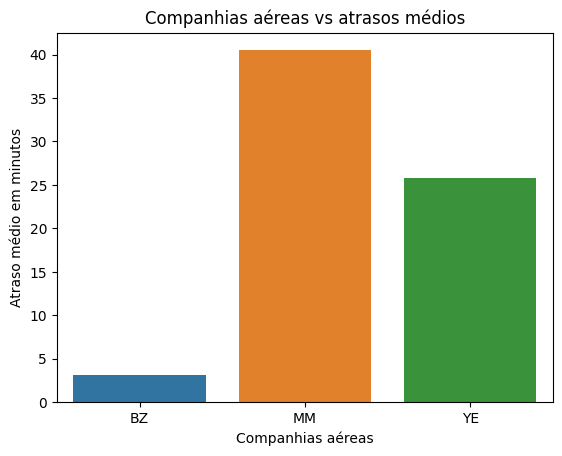

In [ ]:
average_delay = df.groupby('airline')['delay'].mean().reset_index()
sns.barplot(x='airline', y='delay', data=average_delay)
plt.title('Companhias aéreas vs atrasos médios')
plt.xlabel('Companhias aéreas')
plt.ylabel('Atraso médio em minutos')
plt.show()


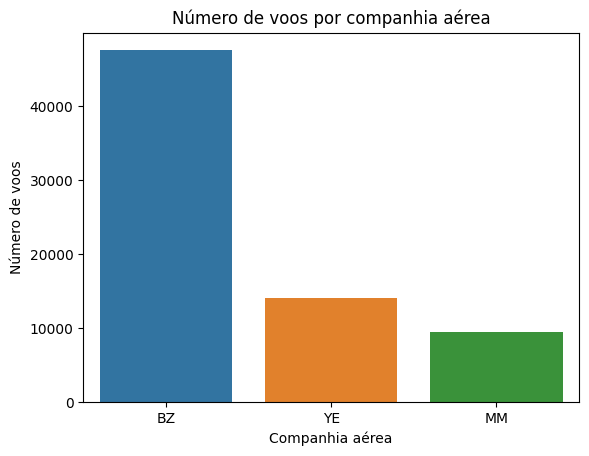

In [ ]:
order = df['airline'].value_counts().index
sns.countplot(data=df, x='airline', order=order)
plt.title('Número de voos por companhia aérea')
plt.xlabel('Companhia aérea')
plt.ylabel('Número de voos')
plt.show()

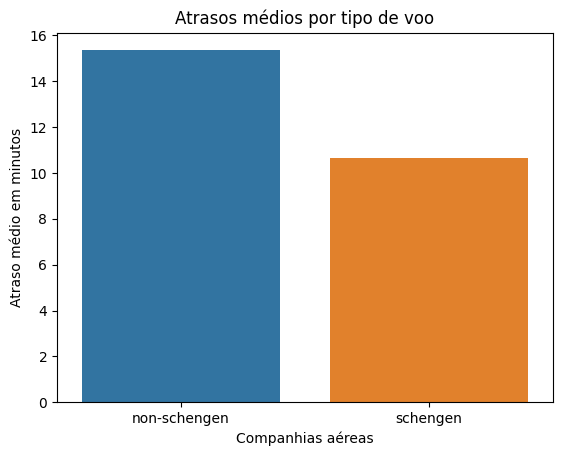

In [ ]:
average_delay_schengen = df.groupby('schengen')['delay'].mean().reset_index()
sns.barplot(x='schengen', y='delay', data=average_delay_schengen)
plt.title('Atrasos médios por tipo de voo')
plt.xlabel('Companhias aéreas')
plt.ylabel('Atraso médio em minutos')
plt.show()


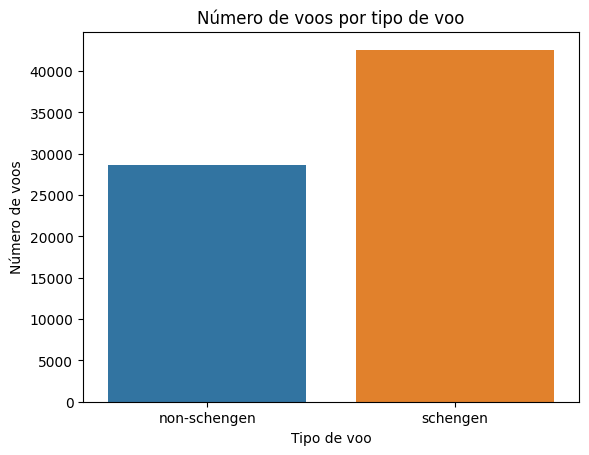

In [ ]:
sns.countplot(data=df, x='schengen')
plt.title('Número de voos por tipo de voo')
plt.xlabel('Tipo de voo')
plt.ylabel('Número de voos');

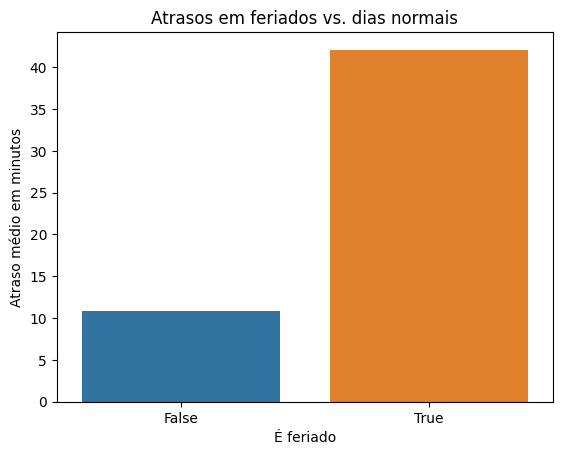

In [ ]:
average_delay_schengen = df.groupby('is_holiday')['delay'].mean().reset_index()
sns.barplot(x='is_holiday', y='delay', data=average_delay_schengen)
plt.title('Atrasos em feriados vs. dias normais')
plt.xlabel('É feriado')
plt.ylabel('Atraso médio em minutos')
plt.show()

----

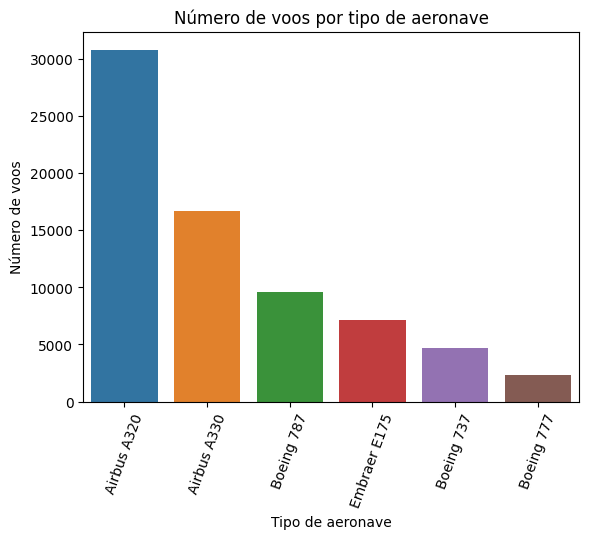

In [ ]:
order = df['aircraft_type'].value_counts().index
sns.countplot(data=df, x='aircraft_type', order = order)
plt.xticks(rotation=70)
plt.title('Número de voos por tipo de aeronave')
plt.xlabel('Tipo de aeronave')
plt.ylabel('Número de voos')
plt.show()

### Analisando a distribuição dos dados

In [ ]:
import numpy as np

def calcular_largura_bin(df, coluna):
    Q75, Q25 = np.percentile(df[coluna], [75 ,25])
    IQR = Q75 - Q25
    largura_bin = 2 * IQR * np.power(len(df[coluna]), -1/3)
    return largura_bin

In [ ]:
binwidth_arrival_time = calcular_largura_bin(df, 'arrival_time')
binwidth_arrival_time

0.3846176245547029

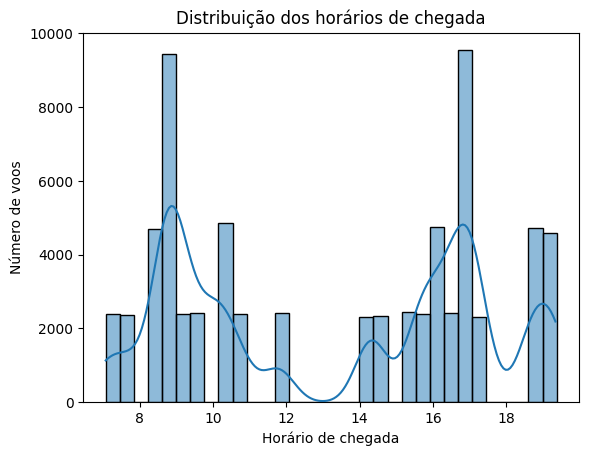

In [ ]:
sns.histplot(data=df, x='arrival_time', binwidth=binwidth_arrival_time, kde=True)
plt.title('Distribuição dos horários de chegada')
plt.xlabel('Horário de chegada')
plt.ylabel('Número de voos')
plt.show()

In [ ]:
binwidth_departure_time = calcular_largura_bin(df, 'departure_time')
binwidth_departure_time

0.3558030990133985

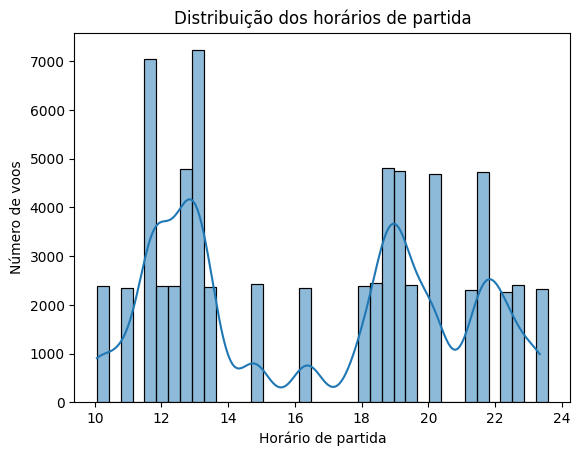

In [ ]:
sns.histplot(data=df, x='departure_time', binwidth=binwidth_departure_time, kde=True)
plt.title('Distribuição dos horários de partida')
plt.xlabel('Horário de partida')
plt.ylabel('Número de voos')
plt.show()

In [ ]:
bandwidth_delay = calcular_largura_bin(df, 'delay')
bandwidth_delay

1.5473962233165988

Fazer a verificação da escala log nesse caso e comprovar que sai de uma distribuição assimétrica a direita para uma distribuição para uma a esquerda, indicando que a transformação log não é indicada.

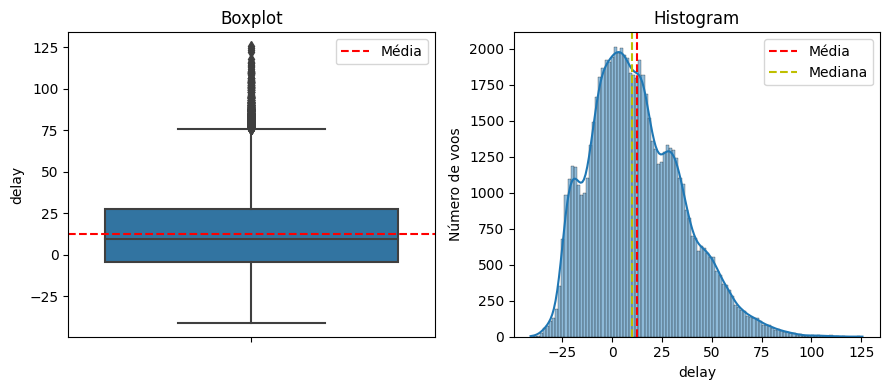

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que 'df' é o seu DataFrame e 'bandwidth_delay' é a largura das caixas do histograma

# Calcule a média e a mediana
mean_delay = df['delay'].mean()
median_delay = df['delay'].median()

# Crie os subplots
fig, axes = plt.subplots(1, 2, figsize=(9, 4))

# Boxplot
sns.boxplot(data=df, y='delay', ax=axes[0])
axes[0].set_title('Boxplot')

# Adicione linhas para a média no boxplot
axes[0].axhline(y=mean_delay, color='r', linestyle='--', label='Média')
axes[0].legend()

# Histograma
sns.histplot(data=df, x='delay', ax=axes[1], kde=True, binwidth=bandwidth_delay)
plt.ylabel('Número de voos')
plt.grid(False)
axes[1].set_title('Histogram')

# Adicione linhas para a média e a mediana no histograma
axes[1].axvline(x=mean_delay, color='r', linestyle='--', label='Média')
axes[1].axvline(x=median_delay, color='y', linestyle='--', label='Mediana')
axes[1].legend()

plt.tight_layout()
plt.show()


In [ ]:
# Calcule a média e a mediana
print(f"Média: {mean_delay:.2f}")
print(f"Mediana: {median_delay:.2f}")

Média: 12.55
Mediana: 9.74


## **Pré-processamento dos dados**

### **Feature engineering**

In [ ]:
df

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271
...,...,...,...,...,...,...,...,...,...,...,...
71170,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,364,2022,True,25.677277
71171,17,BZ,Airbus A330,non-schengen,CNU,16.718722,21.718722,364,2022,True,52.624348
71172,7,MM,Boeing 787,schengen,TZF,8.564949,13.564949,364,2022,True,56.167080
71173,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,364,2022,True,56.758844


In [ ]:
# Criando uma coluna de datas
df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + (df['day'] + 1).astype(str), format='%Y-%j')

# Verificando se é final de semana
df['is_weekend'] = df['date'].dt.weekday.isin([5, 6])

df

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-01-01,False
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-01-01,False
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305,2010-01-01,False
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491,2010-01-01,False
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271,2010-01-01,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71170,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,364,2022,True,25.677277,2022-12-31,True
71171,17,BZ,Airbus A330,non-schengen,CNU,16.718722,21.718722,364,2022,True,52.624348,2022-12-31,True
71172,7,MM,Boeing 787,schengen,TZF,8.564949,13.564949,364,2022,True,56.167080,2022-12-31,True
71173,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,364,2022,True,56.758844,2022-12-31,True


In [ ]:
df['day_of_week'] = df['date'].dt.day_name()

In [ ]:
df.sample(5)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_of_week
40076,22,YE,Airbus A320,non-schengen,MWL,8.794147,11.794147,116,2017,False,47.415521,2017-04-27,False,Thursday
58353,19,MM,Airbus A320,schengen,TZF,16.245220,19.245220,240,2020,False,30.820017,2020-08-28,False,Friday
30459,21,BZ,Boeing 737,schengen,FJB,7.065594,10.065594,205,2015,False,15.946646,2015-07-25,True,Saturday
1768,7,MM,Boeing 787,schengen,TZF,8.564949,13.564949,117,2010,False,16.935389,2010-04-28,False,Wednesday
36151,4,BZ,Airbus A330,schengen,TCY,11.781391,14.781391,220,2016,False,-21.180201,2016-08-08,False,Monday


### **Feature Encoding**

In [ ]:
df['schengen'] = df['schengen'].replace({'non-schengen': 0, 'schengen': 1})
df['is_holiday'] = df['is_holiday'].replace({False: 0, True: 1})
df['is_weekend'] = df['is_weekend'].replace({False: 0, True: 1})

In [ ]:
df.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_of_week
0,26,MM,Airbus A320,0,TCY,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,Friday
1,10,YE,Airbus A320,0,TCY,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,Friday
2,3,BZ,Embraer E175,1,TZF,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,Friday
3,28,BZ,Airbus A330,0,EMM,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,Friday
4,15,BZ,Airbus A330,0,FJB,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,Friday


In [ ]:
# List of categorical variables
categorical_vars = ['airline', 'aircraft_type', 'origin', 'day_of_week']

# one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_vars, dtype=int)

df_encoded.head()

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,26,0,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
1,10,0,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
2,3,1,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,...,0,1,0,1,0,0,0,0,0,0
3,28,0,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0
4,15,0,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0


### **Limpando os Dados**

In [ ]:
df_encoded.head()

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,26,0,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
1,10,0,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
2,3,1,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,...,0,1,0,1,0,0,0,0,0,0
3,28,0,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0
4,15,0,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
df_encoded[['arrival_time', 'departure_time']].corr()

,arrival_time,departure_time
arrival_time,1.000000,0.973797
departure_time,0.973797,1.000000


In [ ]:
df_clean = df_encoded.drop(['flight_id', 'departure_time', 'day', 'year', 'date'], axis=1)
df_clean.head()

,schengen,arrival_time,is_holiday,delay,is_weekend,airline_BZ,airline_MM,airline_YE,aircraft_type_Airbus A320,aircraft_type_Airbus A330,...,origin_TCY,origin_TZF,origin_ZQO,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,0,8.885071,0,70.205981,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,0
1,0,8.939996,0,38.484609,0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,0
2,1,18.635384,0,2.388305,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,0,15.967963,0,19.138491,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,16.571894,0,15.016271,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


## **Seleção e validação do modelo**

### **Treinamento do DummyRegressor**

In [ ]:
X = df_clean.drop(['delay'], axis=1)
y = df_clean['delay']

In [ ]:
X.head()

,schengen,arrival_time,is_holiday,is_weekend,airline_BZ,airline_MM,airline_YE,aircraft_type_Airbus A320,aircraft_type_Airbus A330,aircraft_type_Boeing 737,...,origin_TCY,origin_TZF,origin_ZQO,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,0,8.885071,0,0,0,1,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
1,0,8.939996,0,0,0,0,1,1,0,0,...,1,0,0,1,0,0,0,0,0,0
2,1,18.635384,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,0,15.967963,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,16.571894,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
y.head()

0    70.205981
1    38.484609
2     2.388305
3    19.138491
4    15.016271
Name: delay, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Treinamento do DummyRegressor**

O r2 do dummy sempre vai ser 0 pois está prevendo a média de atraso de todos os voos, talvez seja melhor elaborar outra forma de avaliar uma base para o modelo.

In [ ]:
from sklearn.dummy import DummyRegressor

# Training the model
model_dummy = DummyRegressor()
model_dummy.fit(X_train, y_train)

# Predictions
y_pred_dummy = model_dummy.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def calcular_metricas_regressao(y_test, y_pred):
    """
    Calcula e retorna um dicionário com as métricas comuns de regressão.

    Parâmetros:
    y_test (array-like): Os valores alvo verdadeiros
    y_pred (array-like): Os valores alvo previstos

    Retorna:
    dict: Um dicionário contendo a Raiz do Erro Quadrático Médio,
          o Erro Absoluto Médio, e o coeficiente de determinação R2.
    """
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    metricas = {
        'Raiz do Erro Quadrático Médio': round(rmse, 4),
        'Erro Absoluto Médio': round(mae, 4),
        'R2 Score': round(r2, 4)
    }

    return metricas


In [ ]:
calcular_metricas_regressao(y_test, y_pred_dummy)

{'Raiz do Erro Quadrático Médio': 23.2124,
 'Erro Absoluto Médio': 18.625,
 'R2 Score': -0.0001}

### **Treinamento do RandomForestRegressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Training the model
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)

# Predictions
y_pred_rf = model_rf.predict(X_test)

In [ ]:
calcular_metricas_regressao(y_test, y_pred_rf)

{'Raiz do Erro Quadrático Médio': 13.315,
 'Erro Absoluto Médio': 10.6611,
 'R2 Score': 0.6709}

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


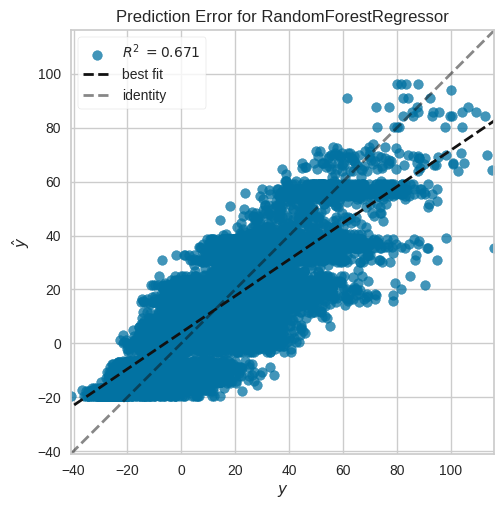

In [ ]:
from yellowbrick.regressor import prediction_error

visualizer = prediction_error(model_rf, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


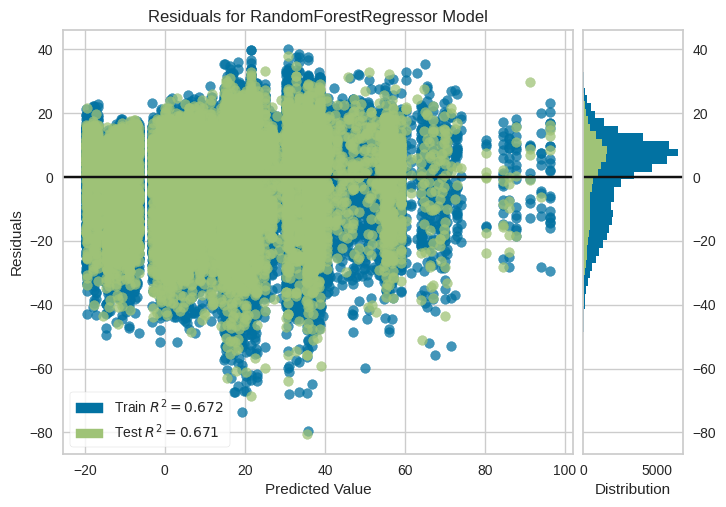

In [ ]:
from yellowbrick.regressor import residuals_plot

viz = residuals_plot(model_rf, X_train, y_train, X_test, y_test)

Se o gráfico de resíduos está normalmente distribuído em torno do 0, isso indica que o modelo de regressão está funcionando bem. Os resíduos são a diferença entre os valores previstos pelo modelo e os valores reais. Se estiverem distribuídos de maneira normal em torno do 0, isso sugere que o modelo está fazendo boas previsões, sem viés sistemático para superestimar ou subestimar os valores reais.

Os resíduos são uma parte essencial da validação do modelo em aprendizado de máquina e estatística. Para um modelo de regressão, como RandomForestRegressor, você pode usar um gráfico de resíduos para visualizar os erros em suas previsões. Se os resíduos estão uniformemente distribuídos em torno de zero, isso indica que o modelo é adequado para os dados.

No entanto, se os resíduos não estão normalmente distribuídos em torno de 0, isso pode indicar a presença de heterocedasticidade, ou seja, os resíduos têm variância não constante. Isso pode ser um sinal de que o modelo não está capturando corretamente alguns aspectos dos dados, como a existência de variáveis omitidas ou a forma funcional incorreta de uma variável incluída no modelo.

### **Validação cruzada**

In [ ]:
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Defining evaluation metrics
scoring = {
    'mae': 'neg_mean_absolute_error',
    'rmse': 'neg_root_mean_squared_error',
    'r2': 'r2'
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Performing cross-validation and calculating metrics
cv_results = cross_validate(model_rf, X_train, y_train, cv=cv, scoring=scoring)

# Iterating over each metric
for metric in scoring.keys():
    scores = cv_results[f'test_{metric}']
    mean_score = "{:.2f}".format(scores.mean())
    std_score = "{:.2f}".format(scores.std())

    # Printing evaluation metrics and standard deviation
    print(f"{metric.upper()} Scores: {[f'{val:.2f}' for val in scores]}")
    print(f"{metric.upper()} Média: {mean_score}, Std: {std_score}")
    print('----------------------------------------------------------------')


MAE Scores: ['-10.77', '-10.70', '-10.69', '-10.70', '-10.76']
MAE Média: -10.72, Std: 0.03
----------------------------------------------------------------
RMSE Scores: ['-13.40', '-13.28', '-13.22', '-13.47', '-13.42']
RMSE Média: -13.36, Std: 0.09
----------------------------------------------------------------
R2 Scores: ['0.66', '0.66', '0.66', '0.67', '0.67']
R2 Média: 0.67, Std: 0.00
----------------------------------------------------------------


## **Otimização de hiperparâmetros**

### **Seleção de recursos**

Colocar um para saber mais explicando como é realizada esse feature importance.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


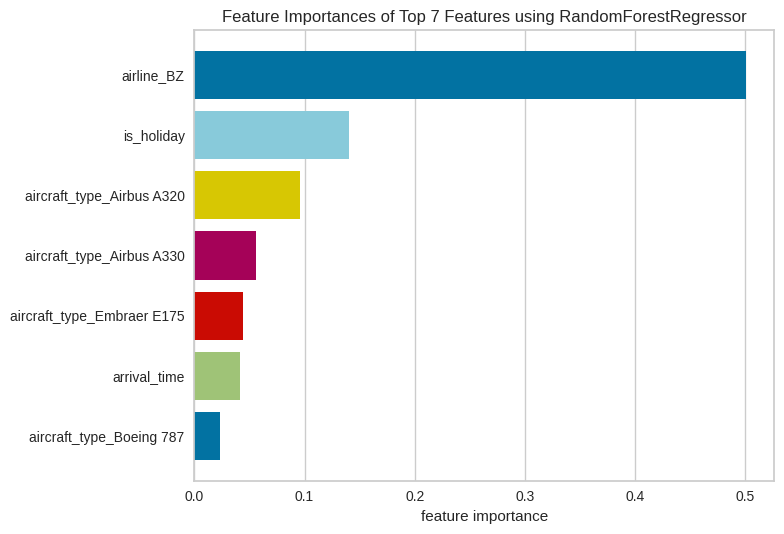

<Axes: title={'center': 'Feature Importances of Top 7 Features using RandomForestRegressor'}, xlabel='feature importance'>

In [ ]:
from yellowbrick.model_selection import FeatureImportances

viz = FeatureImportances(model_rf, relative=False, topn=7)

# Fit and show the feature importances
viz.fit(X_train, y_train)
viz.show()

In [ ]:
# Getting feature importance
importances = model_rf.feature_importances_

# Creating a DataFrame with feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sorting features by importance in descending order
feature_importances = feature_importances.sort_values('Importance', ascending=False)
feature_importances

,Feature,Importance
4,airline_BZ,0.500938
2,is_holiday,0.140530
7,aircraft_type_Airbus A320,0.096216
8,aircraft_type_Airbus A330,0.055833
12,aircraft_type_Embraer E175,0.043921
1,arrival_time,0.041862
11,aircraft_type_Boeing 787,0.023405
20,origin_TCY,0.021659
17,origin_FJB,0.015708
15,origin_CSF,0.013266


In [ ]:
# DataFrame to store the results
results_df = pd.DataFrame(index=['RMSE', 'MAE', 'R2'])

model_selected_features = RandomForestRegressor(random_state=42)

for count in range(1, 11):
    # Selecting the top features
    selected_features = feature_importances['Feature'].values[:count]

    # Filtering the original DataFrame columns with the selected features
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    # Training the model_selected_features with the selected top features only
    model_selected_features.fit(X_train_selected, y_train)

    # Making predictions
    y_pred = model_selected_features.predict(X_test_selected)

    # Calculating evaluation metrics using the function
    metricas = calcular_metricas_regressao(y_test, y_pred)

    # Storing the results in the DataFrame
    results_df[count] = list(metricas.values())

# DataFrame with the results
results_df

Top 1 features: ['airline_BZ']
Top 2 features: ['airline_BZ' 'is_holiday']
Top 3 features: ['airline_BZ' 'is_holiday' 'aircraft_type_Airbus A320']
Top 4 features: ['airline_BZ' 'is_holiday' 'aircraft_type_Airbus A320'
 'aircraft_type_Airbus A330']
Top 5 features: ['airline_BZ' 'is_holiday' 'aircraft_type_Airbus A320'
 'aircraft_type_Airbus A330' 'aircraft_type_Embraer E175']
Top 6 features: ['airline_BZ' 'is_holiday' 'aircraft_type_Airbus A320'
 'aircraft_type_Airbus A330' 'aircraft_type_Embraer E175' 'arrival_time']
Top 7 features: ['airline_BZ' 'is_holiday' 'aircraft_type_Airbus A320'
 'aircraft_type_Airbus A330' 'aircraft_type_Embraer E175' 'arrival_time'
 'aircraft_type_Boeing 787']
Top 8 features: ['airline_BZ' 'is_holiday' 'aircraft_type_Airbus A320'
 'aircraft_type_Airbus A330' 'aircraft_type_Embraer E175' 'arrival_time'
 'aircraft_type_Boeing 787' 'origin_TCY']
Top 9 features: ['airline_BZ' 'is_holiday' 'aircraft_type_Airbus A320'
 'aircraft_type_Airbus A330' 'aircraft_type_Emb

,1,2,3,4,5,6,7,8,9,10
RMSE,18.8295,17.4588,15.9347,15.6213,15.2135,13.3275,13.3275,13.3275,13.3275,13.3275
MAE,14.9740,14.0010,12.9025,12.4938,12.1050,10.7157,10.7157,10.7157,10.7157,10.7157
R2,0.3419,0.4342,0.5287,0.5471,0.5704,0.6703,0.6703,0.6703,0.6703,0.6703


In [ ]:
model_selected_features

RandomForestRegressor(random_state=42)

In [ ]:
# Selecting the top features
selected_features = feature_importances['Feature'].values[:6]

# Filtering the original DataFrame columns with the selected features
X_selected_features = X[selected_features]
X_selected_features

,airline_BZ,is_holiday,aircraft_type_Airbus A320,aircraft_type_Airbus A330,aircraft_type_Embraer E175,arrival_time
0,0,0,1,0,0,8.885071
1,0,0,1,0,0,8.939996
2,1,0,0,0,1,18.635384
3,1,0,0,1,0,15.967963
4,1,0,0,1,0,16.571894
...,...,...,...,...,...,...
71170,1,1,0,0,1,18.635384
71171,1,1,0,1,0,16.718722
71172,0,1,0,0,0,8.564949
71173,1,1,1,0,0,9.344097


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_selected_features,
                                                    y, test_size=0.2,
                                                    random_state=42)

### **Otimizando os hiperparâmetros com o GridSearchCV**

In [ ]:
param_grid = {
 'max_depth': [None, 10, 25],
 'min_samples_leaf': [1, 2, 3],
 'min_samples_split': [2, 4, 6],
 'n_estimators': [100, 150, 200]
 }


In [ ]:
%%time
from sklearn.model_selection import GridSearchCV

# Defining the hyperparameters to be optimized
model_grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=param_grid, cv=3, scoring='r2')
model_grid.fit(X_train, y_train)

CPU times: user 7min 1s, sys: 1.03 s, total: 7min 2s
Wall time: 7min 4s


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 25],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 150, 200]},
             scoring='r2')

In [ ]:
results = pd.DataFrame(model_grid.cv_results_).sort_values('rank_test_score')
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
40,1.467284,0.051473,0.190833,0.002239,10,2,4,150,"{'max_depth': 10, 'min_samples_leaf': 2, 'min_...",0.671843,0.661212,0.665925,0.666327,0.004349,1
46,1.727805,0.437604,0.211460,0.018886,10,3,2,150,"{'max_depth': 10, 'min_samples_leaf': 3, 'min_...",0.671843,0.661212,0.665925,0.666327,0.004349,1
37,1.392115,0.061698,0.187511,0.000285,10,2,2,150,"{'max_depth': 10, 'min_samples_leaf': 2, 'min_...",0.671843,0.661212,0.665925,0.666327,0.004349,1
34,1.798273,0.277664,0.204831,0.012012,10,1,6,150,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",0.671843,0.661212,0.665925,0.666327,0.004349,1
49,1.426707,0.074585,0.190683,0.003449,10,3,4,150,"{'max_depth': 10, 'min_samples_leaf': 3, 'min_...",0.671843,0.661212,0.665925,0.666327,0.004349,1


In [ ]:
model_grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 150}

In [ ]:
print(f"Média de R2: {results['mean_test_score'].mean():.3f}")
print(f"Desvio padrão de R2: {results['std_test_score'].mean():.4f}")

Média de R2: 0.666
Desvio padrão de R2: 0.0043


In [ ]:
y_pred_model_grid = model_grid.predict(X_test)
y_pred_model_grid

array([ 5.81762891, 32.24405016,  5.65094106, ..., 14.78210938,
       -0.95753549, 36.80064414])

In [ ]:
calcular_metricas_regressao(y_test, y_pred_model_grid)

{'Raiz do Erro Quadrático Médio': 13.3278,
 'Erro Absoluto Médio': 10.7161,
 'R2 Score': 0.6703}

In [ ]:
model_tunned = model_grid.best_estimator_

# Making predictions
y_pred_model_tunned = model_tunned.predict(X_test)

# Calculating evaluation metrics using the function
metricas_model_tunned = calcular_metricas_regressao(y_test, y_pred_model_tunned)
metricas_model_tunned


{'Raiz do Erro Quadrático Médio': 13.3278,
 'Erro Absoluto Médio': 10.7161,
 'R2 Score': 0.6703}

In [ ]:
results_df['model_tunned'] = list(metricas_model_tunned.values())
results_df

,1,2,3,4,5,6,7,8,9,10,model_tunned
RMSE,18.8295,17.4588,15.9347,15.6213,15.2135,13.3275,13.3275,13.3275,13.3275,13.3275,13.3278
MAE,14.9740,14.0010,12.9025,12.4938,12.1050,10.7157,10.7157,10.7157,10.7157,10.7157,10.7161
R2,0.3419,0.4342,0.5287,0.5471,0.5704,0.6703,0.6703,0.6703,0.6703,0.6703,0.6703


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(results_df, *[1], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(results_df, *[2], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(results_df, *[3], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(results_df, *[4], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(results_df, *[1], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(results_df, *[2], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(results_df, *[3], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(results_df, *[4], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(results_df, *[[[1, 2], [2, 3], [3, 4], [4, 5]]], **{})
chart

<Figure size 600x180 with 0 Axes>

### Salvando o modelo


### **Salvando modelos de regressão treinados para uso futuro**

In [ ]:
import pickle

file_path = './modelos/modelo_producao.pkl'

try:
    with open(file_path, 'wb') as file:
        pickle.dump(model_tunned, file)
    print("Modelo salvo com sucesso!")
except Exception as e:
    print("Ocorreu um erro ao salvar o modelo:", str(e))

Modelo salvo com sucesso!
